# Plots matriciais

Os gráficos matriciais permitem traçar dados como matrizes codificadas por cores e também podem ser usados para indicar clusters dentro dos dados.

Comecemos por explorar o mapa térmico e o clutermap de Seaborn:

In [11]:
import seaborn as sns
%matplotlib inline

In [12]:
sns.set()

In [3]:
flights = sns.load_dataset('flights')
tips = sns.load_dataset('tips')

In [4]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Heatmap

Para que um mapa de calor funcione corretamente, seus dados já devem estar em uma forma de matriz e a função sns.heatmap basicamente apenas põe cor pra você. Por exemplo:

In [8]:
# Correlograma
crr = tips.corr()
crr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


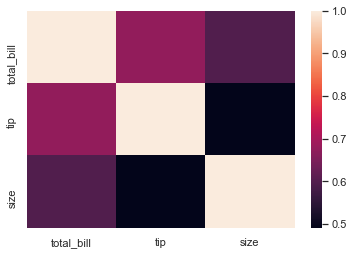

In [15]:
sns.heatmap(crr)

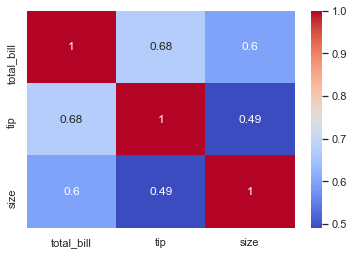

In [16]:
sns.heatmap(crr, cmap='coolwarm', annot=True)

Ou para os dados dos vôos:

In [18]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [19]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [21]:
pf = flights.pivot_table(values='passengers', index='month', columns='year')
pf

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


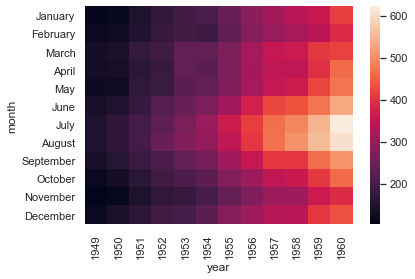

In [29]:
sns.heatmap(pf)

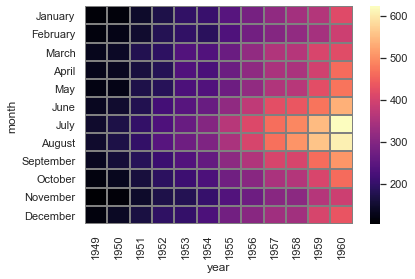

In [33]:
sns.heatmap(pf,cmap='magma',linecolor='gray',linewidths=1)

## clustermap

O clustermap usa agrupamento hierárquico para produzir uma versão em cluster do heatmap. Por exemplo:

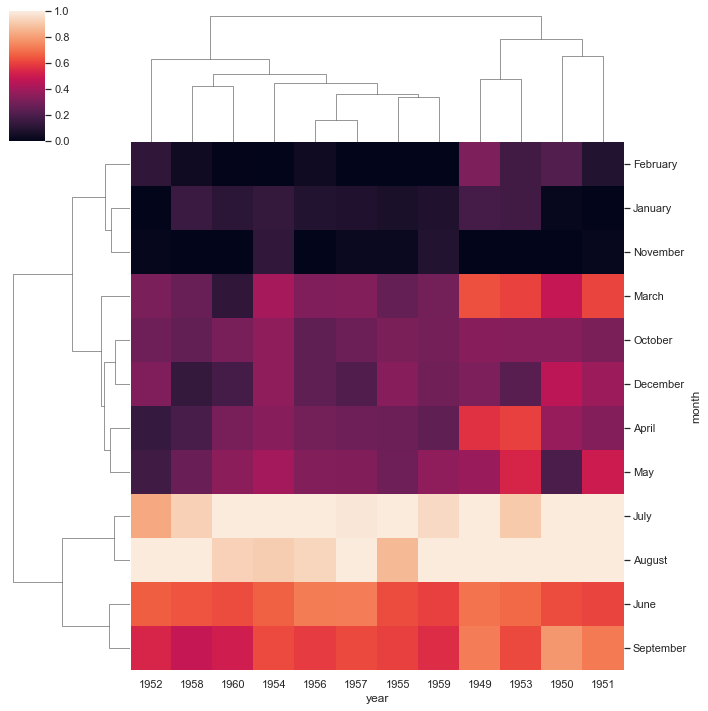

In [35]:
sns.clustermap(pf, standard_scale=1)

Observe agora como os anos e os meses não estão mais em ordem, em vez disso, eles são agrupados por similaridade em valor (contagem de passageiros). Isso significa que podemos começar a inferir coisas desse plot, como agosto e julho sendo semelhantes (faz sentido, uma vez que são ambos os meses de viagem de verão no hemisfério norte)

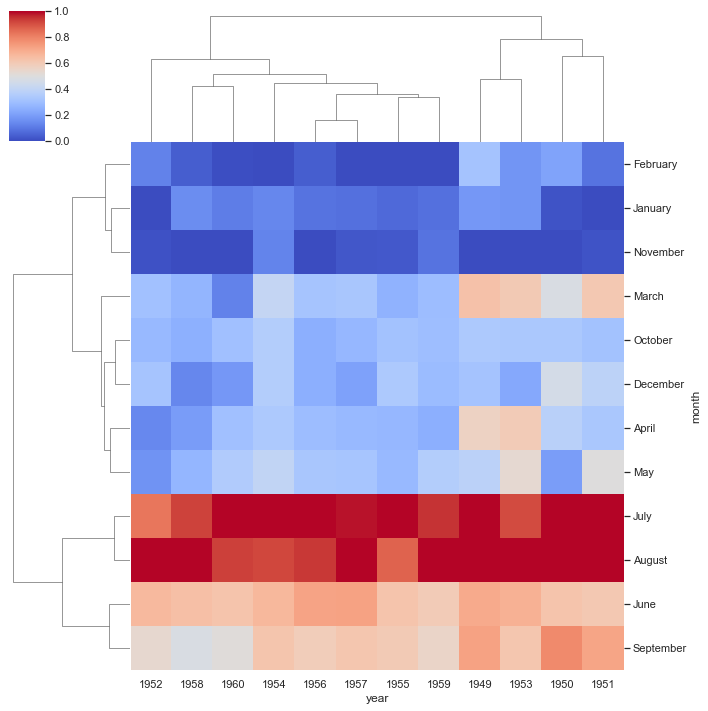

In [36]:
# Mais opções para obter a informação um pouco mais clara, como a normalização
sns.clustermap(pf,cmap='coolwarm',standard_scale=1)